In [1]:
import geopandas as gpd
import pandas as pd
from core.config import GENERATED_DATA_FOLDER, SHP_FOLDER
from core.utils.file_path import solve_path

In [2]:
def load_csv(file:str, folder=GENERATED_DATA_FOLDER, **kwargs)->pd.DataFrame:
    
    fpath = solve_path(file, parent=folder)
    
    return pd.read_csv(fpath, **kwargs, sep=';')

In [4]:
dists_folder = solve_path('distritos', SHP_FOLDER)
dists = gpd.read_file(solve_path('SIRGAS_SHP_distrito', dists_folder))

In [5]:
dists = dists.set_crs(epsg=31983)

In [6]:
dists.head()

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MOOCA,53,25,MOOCA,MOO,7.948972e+06,7.949,"POLYGON ((338349.356 7394264.944, 338362.239 7..."
2,CIDADE ADEMAR,22,16,CIDADE ADEMAR,CAD,1.234284e+07,12.343,"POLYGON ((332332.417 7381170.543, 332348.402 7..."
3,TREMEMBE,81,06,JACANA-TREMEMBE,TRE,5.671477e+07,56.715,"POLYGON ((337037.395 7403901.769, 337033.929 7..."
4,SAO LUCAS,72,29,VILA PRUDENTE,SLU,9.675986e+06,9.676,"POLYGON ((340488.820 7391250.151, 340501.069 7..."


In [7]:
dists=dists[['ds_nome', 'ds_sigla', 'ds_areakm', 'geometry']]

<AxesSubplot: >

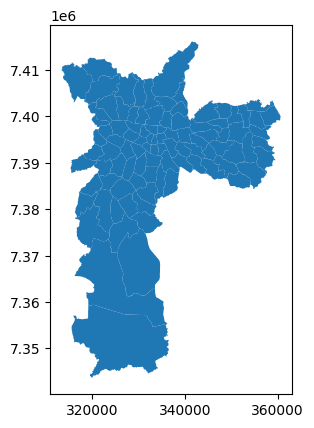

In [8]:
dists.plot()

In [9]:
delta = load_csv('delta_area_construida_distrito.csv')

In [10]:
delta

,ds_nome,area_construida_vertical_2013,area_construida_vertical_2023,delta_pde
0,AGUA RASA,1622759.0,2108421.0,485662.0
1,ALTO DE PINHEIROS,2065880.0,2243481.0,177601.0
2,ANHANGUERA,0.0,1377.0,1377.0
3,ARICANDUVA,322938.0,640265.0,317327.0
4,ARTUR ALVIM,581546.0,657230.0,75684.0
...,...,...,...,...
91,VILA MARIANA,7255968.0,8508510.0,1252542.0
92,VILA MATILDE,520274.0,862138.0,341864.0
93,VILA MEDEIROS,252836.0,440271.0,187435.0
94,VILA PRUDENTE,1373230.0,2079668.0,706438.0


In [11]:
def sqm_to_sqkm(sqms:float)->float:
    
    return sqms/1000000

In [12]:
cols_dados = ['area_construida_vertical_2013', 'area_construida_vertical_2023', 'delta_pde']

In [13]:
for col in cols_dados:
    delta[col] = delta[col].apply(sqm_to_sqkm)

In [14]:
(delta['delta_pde']<0).any()

False

In [15]:
delta

,ds_nome,area_construida_vertical_2013,area_construida_vertical_2023,delta_pde
0,AGUA RASA,1.622759,2.108421,0.485662
1,ALTO DE PINHEIROS,2.065880,2.243481,0.177601
2,ANHANGUERA,0.000000,0.001377,0.001377
3,ARICANDUVA,0.322938,0.640265,0.317327
4,ARTUR ALVIM,0.581546,0.657230,0.075684
...,...,...,...,...
91,VILA MARIANA,7.255968,8.508510,1.252542
92,VILA MATILDE,0.520274,0.862138,0.341864
93,VILA MEDEIROS,0.252836,0.440271,0.187435
94,VILA PRUDENTE,1.373230,2.079668,0.706438


In [16]:
def merge_on_dists(df):
    
    df = pd.merge(df, dists, on='ds_nome', how='outer')
    gdf = gpd.GeoDataFrame(df)
    gdf = gdf.set_crs(epsg=31983)
    gdf = gdf.to_crs(epsg=4326)
    
    return gdf

In [17]:
delta = merge_on_dists(delta)

<AxesSubplot: >

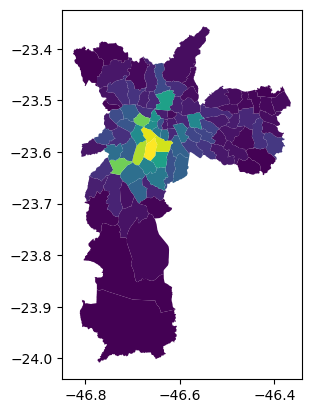

In [18]:
delta.plot('area_construida_vertical_2013')

<AxesSubplot: >

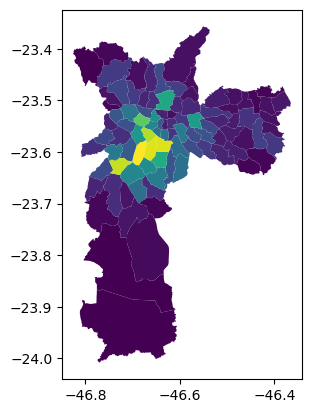

In [19]:
delta.plot('area_construida_vertical_2023')

<AxesSubplot: >

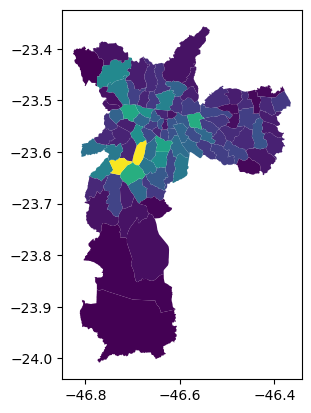

In [20]:
delta.plot('delta_pde')

In [21]:
import os
geojson_folder = 'geojsons'

In [22]:
if not os.path.exists(geojson_folder):
    os.mkdir(geojson_folder)

In [23]:
def save_geojson(geodf, name):
    
    if not name.endswith('geojson'):
        name += '.geojson'
    path = solve_path(name, geojson_folder)
    
    geodf.to_file(path, driver='GeoJSON')  

In [24]:
save_geojson(delta, 'delta_pde')

In [25]:
dists_wgs=  dists.to_crs(epsg=4326)

In [26]:
save_geojson(dists_wgs, 'dists_wgs84')

In [27]:
commutes = load_csv('media_duracao_viagem_trabalho_dist.csv')

In [28]:
commutes.head()

,ds_origem_nome,DURACAO
0,AGUA RASA,29.467033
1,ALTO DE PINHEIROS,25.664789
2,ANHANGUERA,55.254902
3,ARICANDUVA,42.084112
4,ARTUR ALVIM,45.715447


In [29]:
commutes.rename({'ds_origem_nome' : 'ds_nome'}, axis=1, inplace=True)

In [30]:
commutes.head()

,ds_nome,DURACAO
0,AGUA RASA,29.467033
1,ALTO DE PINHEIROS,25.664789
2,ANHANGUERA,55.254902
3,ARICANDUVA,42.084112
4,ARTUR ALVIM,45.715447


In [31]:
commutes = merge_on_dists(commutes)

<AxesSubplot: >

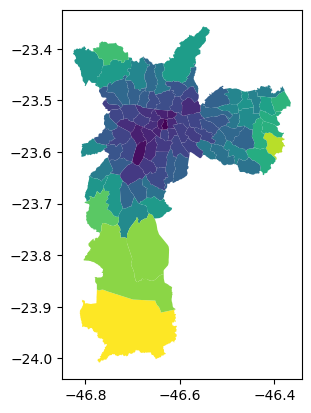

In [32]:
commutes.plot('DURACAO')

In [33]:
save_geojson(commutes, 'commute_times')

In [49]:
percent_jobs = load_csv('percent_empregos_por_dist.csv')

In [50]:
percent_jobs

,ds_nome,percent_empregos
0,AGUA RASA,0.007403
1,ALTO DE PINHEIROS,0.003344
2,ANHANGUERA,0.000587
3,ARICANDUVA,0.004772
4,ARTUR ALVIM,0.001394
...,...,...
91,VILA MEDEIROS,0.003669
92,VILA PRUDENTE,0.005672
93,VILA SONIA,0.006962
94,SAO DOMINGOS,0.015783


In [51]:
percent_jobs = merge_on_dists(percent_jobs)

In [52]:
percent_jobs['percent_empregos'] = percent_jobs['percent_empregos']*100

<AxesSubplot: >

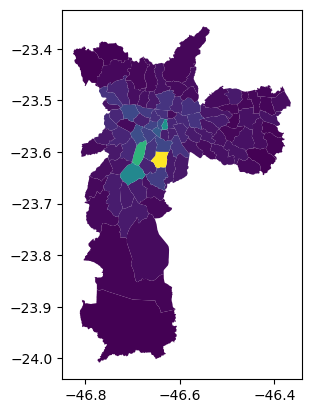

In [53]:
percent_jobs.plot('percent_empregos')

In [54]:
save_geojson(percent_jobs, 'percent_jobs_per_district')

In [55]:
percent_jobs['percent_empregos']

0     0.740285
1     0.334422
2     0.058696
3     0.477188
4     0.139358
        ...   
91    0.366935
92    0.567183
93    0.696201
94    1.578294
95    0.550913
Name: percent_empregos, Length: 96, dtype: float64

In [56]:
market_acess = load_csv('percent_jobs_acessible.csv')

In [57]:
market_acess

,ds_origem_nome,percent_empregos_destino
0,AGUA RASA,0.369173
1,ALTO DE PINHEIROS,0.563248
2,ANHANGUERA,0.199421
3,ARICANDUVA,0.145392
4,ARTUR ALVIM,0.234090
...,...,...
91,VILA MARIANA,0.757271
92,VILA MATILDE,0.319995
93,VILA MEDEIROS,0.188100
94,VILA PRUDENTE,0.609241


In [58]:
market_acess.rename({'ds_origem_nome' : 'ds_nome'}, axis=1, inplace=True)

In [59]:
market_acess = merge_on_dists(market_acess)

In [60]:
save_geojson(market_acess, 'job_market_access')

In [61]:
market_acess

,ds_nome,percent_empregos_destino,ds_sigla,ds_areakm,geometry
0,AGUA RASA,0.369173,ARA,7.177,"POLYGON ((-46.55714 -23.57545, -46.55714 -23.5..."
1,ALTO DE PINHEIROS,0.563248,API,7.461,"POLYGON ((-46.69732 -23.54081, -46.69730 -23.5..."
2,ANHANGUERA,0.199421,ANH,33.548,"POLYGON ((-46.77519 -23.47270, -46.77536 -23.4..."
3,ARICANDUVA,0.145392,ARI,6.960,"POLYGON ((-46.52809 -23.58433, -46.52809 -23.5..."
4,ARTUR ALVIM,0.234090,AAL,6.508,"POLYGON ((-46.47502 -23.52381, -46.47501 -23.5..."
...,...,...,...,...,...
91,VILA MARIANA,0.757271,VMN,8.598,"POLYGON ((-46.64300 -23.59974, -46.64349 -23.5..."
92,VILA MATILDE,0.319995,VMT,8.769,"POLYGON ((-46.54827 -23.53505, -46.54842 -23.5..."
93,VILA MEDEIROS,0.188100,VMD,7.856,"POLYGON ((-46.56113 -23.48727, -46.56113 -23.4..."
94,VILA PRUDENTE,0.609241,VPR,9.585,"POLYGON ((-46.55125 -23.60669, -46.55133 -23.6..."
